In [10]:
from hyperobjects import Sphere, Orthotope
import matplotlib.pyplot as plt
from pycapacity.human import force_polytope
from pycapacity.visual import plot_polytope
from pycapacity.objects import Polytope

import numpy as np

### First, let's create a random zonotope

In [72]:
p, n, m = 3, 5, 70
np.random.seed(32)

J = np.random.uniform(-1, 2, size=(p,n))
N = np.random.uniform(-1, 4, size=(n, m))
t_min = 0*np.ones(m)
t_max = np.random.uniform(low=20, high=50,size=m)

P = force_polytope(J, N, t_min, t_max, tol=10)

### Now, we approximate this zonotope by an ellipsoid

In [79]:
T = Orthotope.from_bounds(t_min, t_max)
T = Orthotope(T.semi_axes_length, center=((t_max.mean()+t_min.mean()) / 2) * np.ones(m))
S = T.to_sphere(method="mean_axes", projection_constant=True)
Z = N @ S

In [80]:
S_on_tau = (J.T @ Sphere(p)).uniform_sample(1000, 42)

K = Z.intersect_with_lines(S_on_tau)
print(K.shape)
K_on_cart = np.linalg.pinv(J.T) @ K
P2 = Polytope(vertices=K_on_cart)

(5, 368)


using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


Text(0.5, 0, 'z')

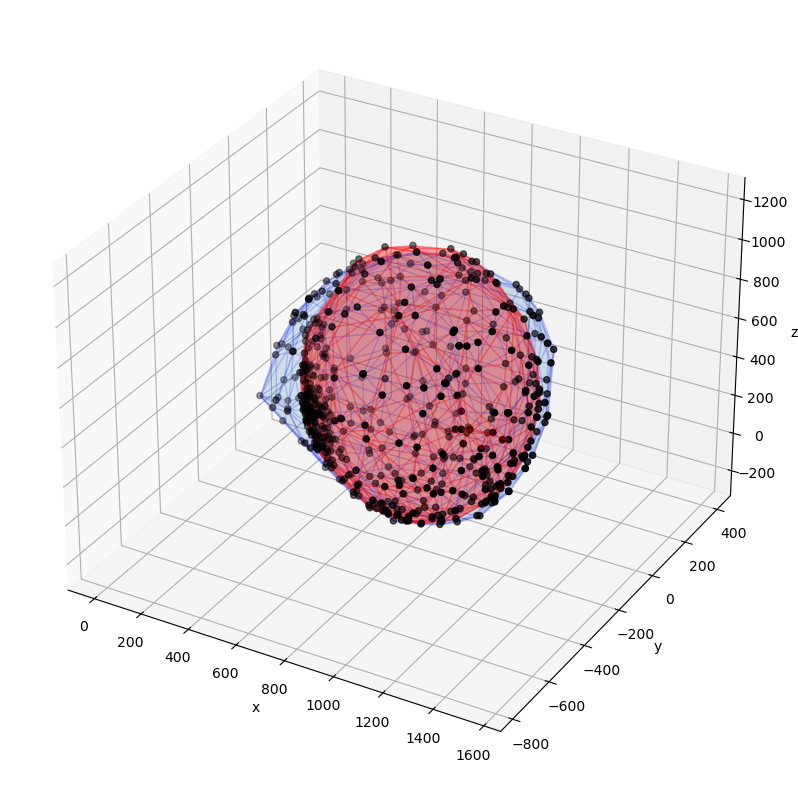

In [81]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=P2, plot=ax, edge_color="red", face_color="red", alpha=0.2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [82]:
%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=P2, plot=ax, edge_color="red", face_color="red", alpha=0.2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

using provided 3d axis
using provided 3d axis


Text(0.5, 0, 'z')